In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

In [4]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
)

In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history1=model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history2=model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2316 - accuracy: 0.9333 - val_loss: 0.1011 - val_accuracy: 0.9731
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0856 - accuracy: 0.9748 - val_loss: 0.0742 - val_accuracy: 0.9794
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0636 - accuracy: 0.9815 - val_loss: 0.0687 - val_accuracy: 0.9810
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0523 - accuracy: 0.9842 - val_loss: 0.0644 - val_accuracy: 0.9811
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0445 - accuracy: 0.9867 - val_loss: 0.0647 - val_accuracy: 0.9820
Epoch 1/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3105 - accuracy: 0.9081 - val_loss: 0.1097 - val_accuracy: 0.9681
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2143 - accuracy: 0.9358 - val_loss: 0.1061 - val_accuracy: 0.

In [6]:
model.evaluate(x_test, y_test)
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9708


[0.09718161076307297, 0.97079998254776]

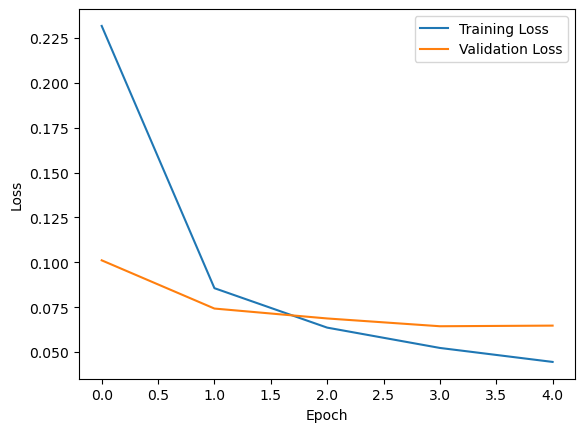

In [7]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

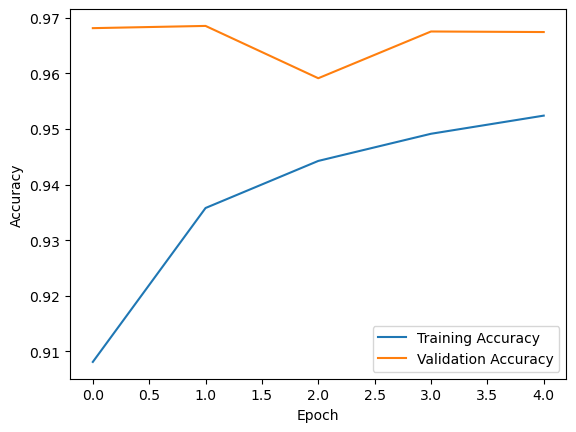

In [8]:
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()